# IMAGE SEGMENTATION USING K-MEANS :

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')

## READING AN IMAGE :

In [53]:
img = cv2.imread('bean.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original_shape = img.shape
print(original_shape)

(450, 900, 3)


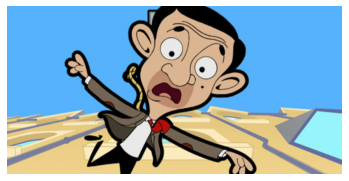

In [54]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [55]:
#FLATTENING THE IMAGE TO MAKE IT AS A LINEAR ARRAY:

In [56]:
flattened = img.reshape((-1, 3))  #OR img.reshape(4000*6016, 3)

In [57]:
print(flattened.shape)

(405000, 3)


## CLUSTERING THE DOMINANT COLORS USING K-MEANS :

In [58]:
dominant_colors = 4   #we need only top 4 dominant colors from the image

In [59]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = dominant_colors)

model.fit(flattened)

KMeans(n_clusters=4)

In [60]:
centers = model.cluster_centers_    #R G B values for obtained 4 colors

In [61]:
centers = np.array(centers, dtype='uint8')

In [62]:
print(centers)

[[228 201 150]
 [ 17  12  10]
 [ 90 181 251]
 [130 117 115]]


## PLOTTING THE OBTAINED COLORS :

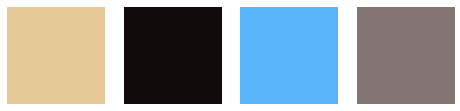

In [63]:
i = 1


plt.figure(0, figsize=(8, 6))
colors = []
for each_color in centers:
    plt.subplot(1, 4, i)
    plt.axis('off')
    i += 1
   
    colors.append(each_color)
    
    a = np.zeros((100, 100, 3), dtype='uint8')
    a[:, :, :] = each_color
    plt.imshow(a)
plt.show()

## THESE ARE THE 4 DOMINANT COLORS IN THE IMAGE

In [64]:
new_img = np.zeros((450*900, 3), dtype='uint8')
new_img.shape

(405000, 3)

In [65]:
colors

[array([228, 201, 150], dtype=uint8),
 array([17, 12, 10], dtype=uint8),
 array([ 90, 181, 251], dtype=uint8),
 array([130, 117, 115], dtype=uint8)]

In [66]:
model.labels_

array([2, 2, 2, ..., 0, 0, 0])

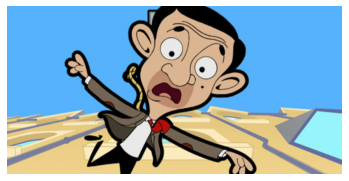

In [73]:
org_img = cv2.imread('bean.jpg')
org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
plt.imshow(org_img)
plt.axis('off')
plt.show()

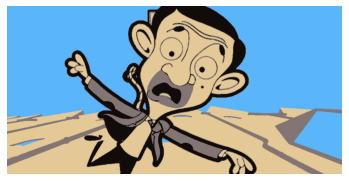

In [67]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[model.labels_[ix]]
    
new_img = new_img.reshape((original_shape))    
plt.imshow(new_img)
plt.title()
plt.axis('off')
plt.show()

### HERE WE CAN CLEARLY SEE THE DIFFERENCE BETWEEN OUR ORIGINAL AND SEGMENTED IMAGE,

### WHERE OUR SEGMENTED IMAGE CONTAINS ONLY THE 4 DOMINANT COLORS.